# **TSF Summer Internship**
# **Task - 6: Prediction Using Decision Tree Algorithm**
**Aim:** From the given ‘Iris’ dataset, Create the Decision Tree classifier and visualize it graphically.

**Author:** Dhruv Shah

**Below shown image represents the a sample data that the given dataset contains of.**

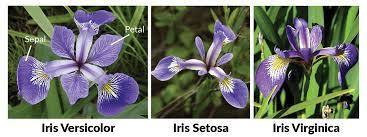

**Importing required Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

**Uploading Dataset from the local machine**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


**Reading the dataset**

In [ ]:
data = pd.read_csv('Iris.csv')

**˘Creating a dummy dataframe variable so all the manipulations to the dataset does not affect the orignial data frame variable**

In [ ]:
df = data

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Checking the characteristics of the dataset**

In [ ]:
df.shape

(150, 6)

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Validating the Dataset**

In [ ]:
df.isna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Droping the ID column as it is of no use**

In [ ]:
df.drop('Id', axis = 1, inplace = True)

**Converting categorical Species column to number format i.e Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_le = le.fit_transform(df['Species'])

In [ ]:
print(y_le)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
df.drop('Species', axis = 1, inplace = True)

In [ ]:
df['Species'] = y_le

**Checking the manipulated dataset**

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Checking for outliers in the dataset using BoxPlot**

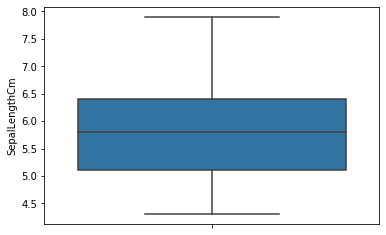

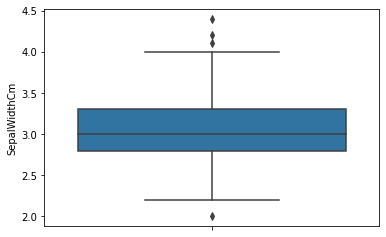

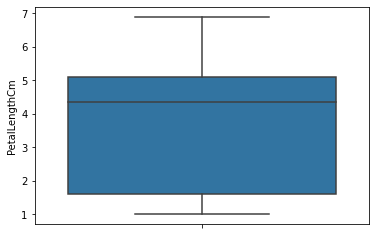

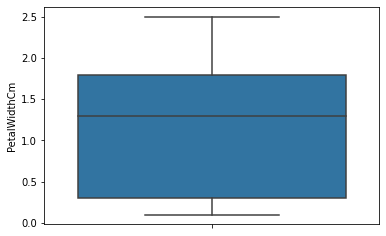

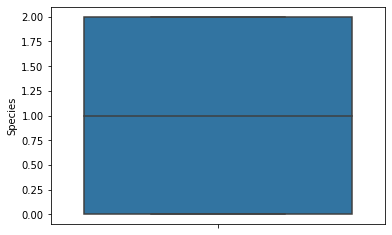

In [ ]:
for i in df:
  sns.boxplot(y=df[i])
  plt.show()

**From the above boxplots, we can visualize that column Sepalwidth has outliers**

**Defining the IQR technique for outlier removal**

In [ ]:
#Importing necessary libraries for outlier removal
from scipy.stats import iqr
%matplotlib inline

In [ ]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [ ]:
lower_r, upper_r = outlier_treatment(df.SepalWidthCm)

In [ ]:
print(lower_r)
print(upper_r)

2.05
4.05


**Displaying the outliers from the SepalWidth column**

In [ ]:
df[(df.SepalWidthCm > upper_r) | (df.SepalWidthCm < lower_r)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0
60,5.0,2.0,3.5,1.0,1


**Droping the rows being outliers**

In [ ]:
df.drop(df[(df.SepalWidthCm > upper_r) | (df.SepalWidthCm < lower_r)].index, inplace=True)

**Visualizing the boxplot for SepalWidth again after removal of outliers**

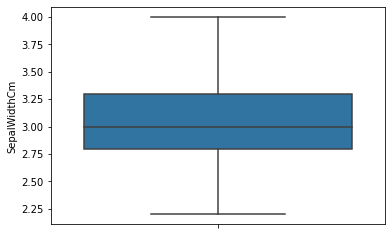

In [ ]:
sns.boxplot(y=df['SepalWidthCm'])
plt.show()

**Spliting the dataset into dependent variable and independent variables**

In [ ]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


**Importing libraries for building Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

**Splitting the dataset into 70% train set and 30% test set**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**It is important to standardized the dataset before applying Decision Tree Classifier**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

**Fiting the data and making predictions on test dataset**

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

**Accuracy Metric for the model**

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9545454545454546


In [ ]:
print(y_pred)

[2 2 1 1 2 1 2 2 0 1 0 0 1 0 2 0 2 0 2 0 2 1 0 2 1 0 2 2 1 1 2 1 0 2 0 0 2
 0 0 1 1 1 2 0]


**Scatter plot to visualize the predicted data of test dataset**

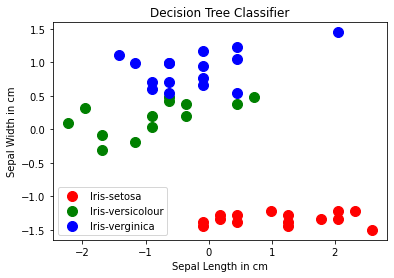

In [ ]:
plt.scatter(x_test[y_pred == 0, 0], x_test[y_pred == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x_test[y_pred == 1, 0], x_test[y_pred == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x_test[y_pred == 2, 0], x_test[y_pred == 2, 1], s = 100, c = 'blue', label = 'Iris-verginica')

#Plotting the centroids of the clusters
plt.title("Decision Tree Classifier")
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')
plt.legend()
plt.show()

**Making Prediction on train dataset just to visualize the scatter plot for the train dataset**

In [ ]:
y_pred_train = clf.predict(x_train)

In [ ]:
print(y_pred_train)
print("Accuracy:", metrics.accuracy_score(y_train, y_pred_train))

[0 1 0 0 2 2 2 1 1 2 2 1 0 2 1 0 0 1 2 2 0 2 2 1 1 2 2 0 1 2 1 2 1 0 0 0 2
 0 2 2 0 0 1 0 2 1 2 2 1 2 2 1 0 1 0 1 1 0 1 0 0 2 2 2 1 0 1 0 2 0 2 2 1 2
 0 1 0 1 1 0 0 1 0 1 1 0 1 2 1 1 2 0 0 2 1 2 1 2 2 1 2 0]
Accuracy: 1.0


**Scatter plot for train dataset**

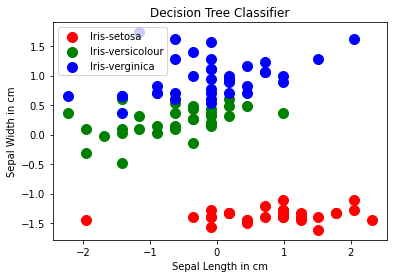

In [ ]:
plt.scatter(x_train[y_pred_train == 0, 0], x_train[y_pred_train == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x_train[y_pred_train == 1, 0], x_train[y_pred_train == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x_train[y_pred_train == 2, 0], x_train[y_pred_train == 2, 1], s = 100, c = 'blue', label = 'Iris-verginica')

#Plotting the centroids of the clusters
plt.title("Decision Tree Classifier")
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')
plt.legend()
plt.show()

**Visualizing the Decision Tree**

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


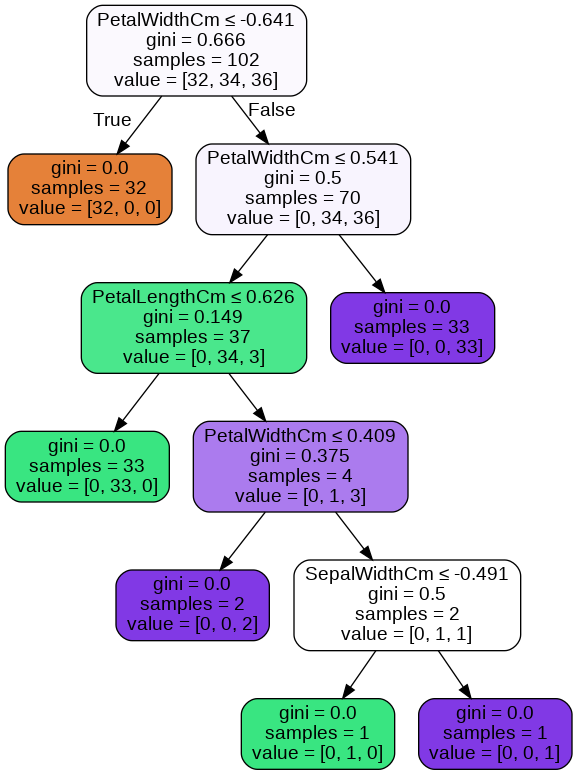

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(df.columns[1:-1].values))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Iris_Dataset_Classification.png')
Image(graph.create_png())

**Pruning the Classifier to the best hyper parameter values**

In [ ]:
prune_clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 4, splitter = 'random')
prune_clf = prune_clf.fit(x_train, y_train)
y_pred_prune = prune_clf.predict(x_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_prune))

Accuracy: 0.9772727272727273


**The accuracy for pruned model is greater than the non-pruned model**

**Visualizing the Pruned Decision Tree Classifier**

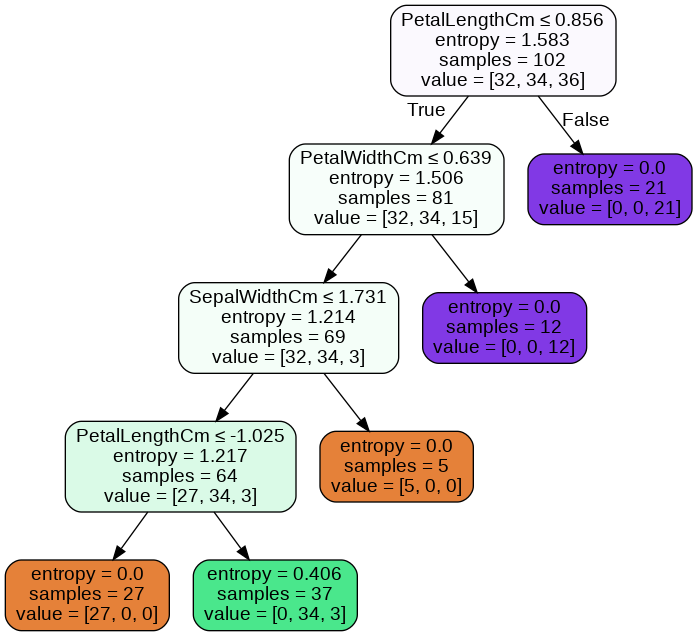

In [ ]:
dot_data = StringIO()
export_graphviz(prune_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(df.columns[1:-1].values))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Iris_Dataset_Classification_Pruned.png')
Image(graph.create_png())